🔹 شكل البيانات: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
 بعد التصحيح والتنظيف:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----

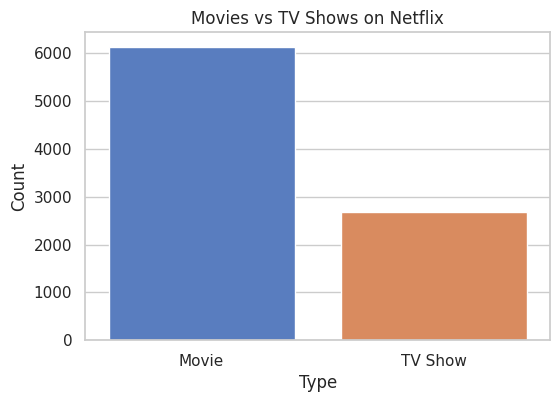

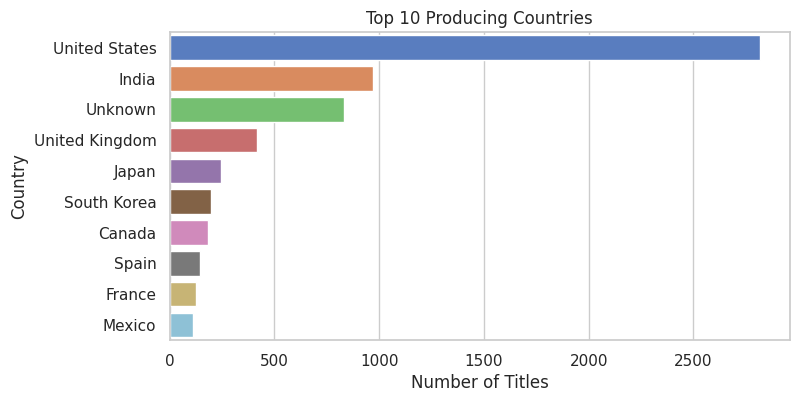

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


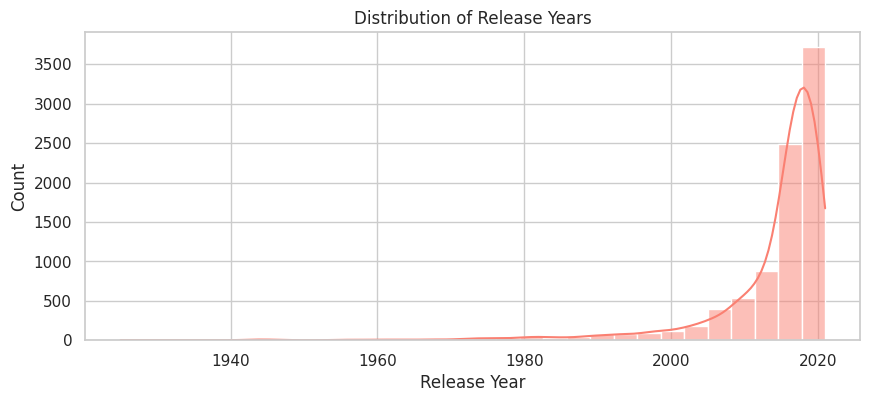

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


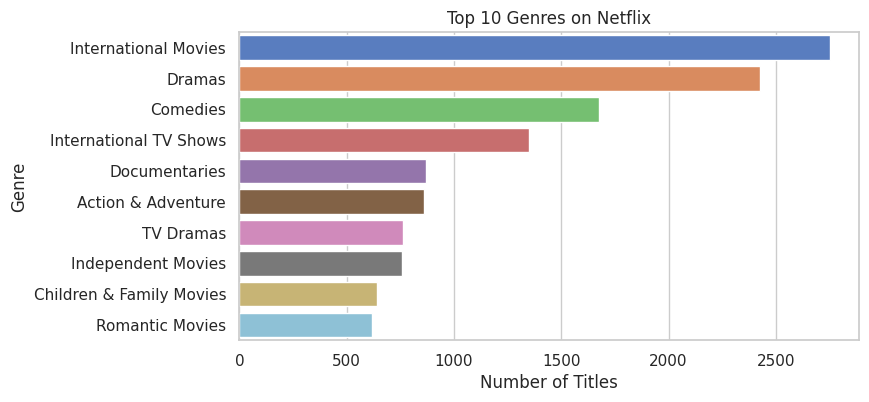

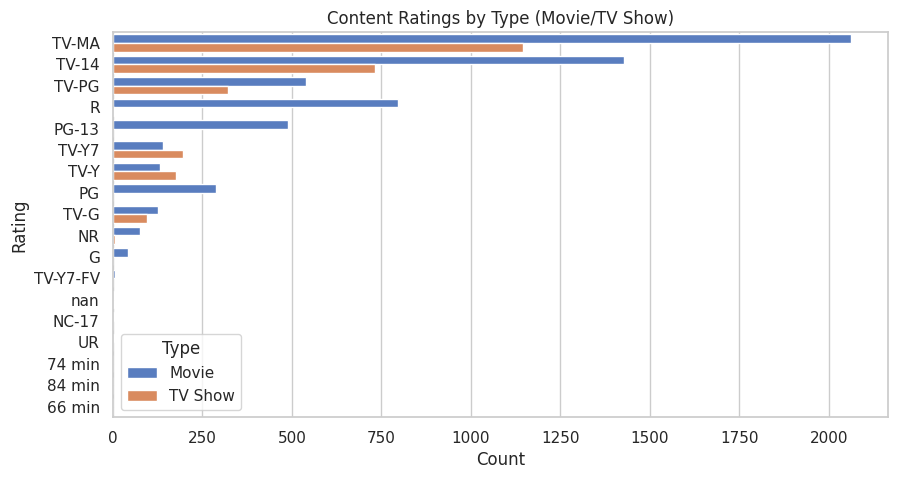

In [ ]:
# Netflix Movies & TV Shows Data Analysis in Kaggle
# ------------------------------------------

#  استيراد المكتبات
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# إعداد النمط
sns.set(style="whitegrid", palette="muted")

# تحميل البيانات من المسار الذي يوفره Kaggle تلقائياً
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

#  نظرة أولية
print(">><<  شكل البيانات:", df.shape)
print(df.info())
df.head()

#  تنظيف البيانات
df.drop_duplicates(inplace=True)


#معالجة القيم المفقودة
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# إزالة المسافات الزائدة في الأعمدة النصية
df['date_added'] = df['date_added'].astype(str).str.strip()
df['type'] = df['type'].astype(str).str.strip()
df['rating'] = df['rating'].astype(str).str.strip()
df['listed_in'] = df['listed_in'].astype(str).str.strip()

# تحويل عمود التاريخ بصيغة مختلطة
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')

# استخراج السنة
df['year_added'] = df['date_added'].dt.year

print(" بعد التصحيح والتنظيف:")
print(df.info())


# ⃣ تحليل استكشافي (EDA)

# 5.1 Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 5.2 Top 10 Producing Countries

countries = df[df['country'] != 'Unknown']
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 5.3 Distribution of Release Years
plt.figure(figsize=(10,4))
sns.histplot(df['release_year'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# 5.4 Top 10 Genres
df_cleaned = df[df['country'] != 'Unknown'].copy()

genres = ','.join(df['listed_in'].dropna()).split(',')
genres = [g.strip() for g in genres]
genre_count = Counter(genres).most_common(10)

plt.figure(figsize=(8,4))
sns.barplot(x=[x[1] for x in genre_count], y=[x[0] for x in genre_count])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# 5.5 Ratings by Type
plt.figure(figsize=(10,5))
sns.countplot(y='rating', hue='type', data=df, order=df['rating'].value_counts().index)
plt.title('Content Ratings by Type (Movie/TV Show)')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()
